# Introduction
The following Juypter Notebook will detail a summary of the explortory data analysis process conducted, alongside the conclusions this data analysis provided in regard to the project data.

# Initialisation
Firstly this notebook needs to be set up to conduct exploratory data anlysis. This involves importing the various libraries and the data itself into this Juypter Notebook.
The data will be stored in 4 different data frames: `energy_data`, `temperature_data`, `stations_data` and `data`.

In [1]:
#imports various libraries needed for data management, plotting and analysis 
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"
pd.options.display.max_columns = None

In [2]:
#loads the data from saved files into pands dataframes
energy_data, temperature_data, stations_data = pd.read_pickle("../Data/CleanedData.pickle")
data = pd.read_pickle("../Data/Data.pickle")

# Descriptive Statistics
Pandas has a `describe` function which computes a series of statistics on each column. For the purpose of this analysis, some columns have been excluded from this process. In some cases, descriptive statistics may be misleading (i.e. for categorical variables) thus ommited columns where chosen based upon human judgement and the data type of each column.

For the `energy_data` dataframe, there appears to be no missing data as the count for `TotalDemand` and `RRP` is identical. `TotalDemand` has an average of 4619MW with a mimimum of 21mW and a maximum of 14579MW.

For the `temperature_data` dataframe, the inconsistent counts across the different weather measurements suggests there is missing data from more than a few records. This missing data will need to be analysed and assessed futher during exploratory analysis as this empty data can have an effect on models and other analysis between the weather and demand data. Air, wet bulb and dew point temperatures range from a minimum of -9.0°C to a maximum of 51.2°C.

In [3]:
energy_data[["TotalDemand", "RRP"]].describe()
temperature_data.describe()
stations_data[["StationHeight", "BarometerHeight", "CompletionPercent"]].describe()

,TotalDemand,RRP
count,1.658965e+06,1.658965e+06
mean,4.619879e+03,5.142330e+01
std,2.848202e+03,1.912126e+02
min,2.189000e+01,-1.000000e+03
25%,1.414270e+03,2.334000e+01
50%,5.131463e+03,3.441000e+01
75%,6.591495e+03,5.487000e+01
max,1.457986e+04,1.470000e+04


,StationNumber,Precipitation,AirTemperature,WetBulbTemperature,DewTemperature,RelativeHumidity,WindSpeed,WindDirection,WindgustSpeed,SeaPressure,StationPressure
count,1.826244e+06,1.406362e+06,1.014593e+06,1.805564e+06,1.140835e+06,1.140832e+06,852918.000000,1.036750e+06,1.089933e+06,1.574715e+06,1.805909e+06
mean,6.297429e+04,1.041248e+00,1.677426e+01,1.317785e+01,9.110140e+00,6.420346e+01,11.629759,1.903881e+02,1.936450e+01,1.016152e+03,1.011931e+03
std,2.686676e+04,4.703112e+00,6.243056e+00,4.676769e+00,5.478454e+00,1.900003e+01,8.852645,1.161376e+02,1.302222e+01,7.868127e+00,8.247630e+00
min,2.309000e+04,0.000000e+00,-1.940000e+01,-9.000000e-01,-3.920000e+01,1.000000e+00,0.000000,0.000000e+00,0.000000e+00,9.749000e+02,9.688000e+02
25%,4.091300e+04,0.000000e+00,1.220000e+01,9.600000e+00,5.100000e+00,5.100000e+01,5.400000,8.000000e+01,1.120000e+01,1.011400e+03,1.007100e+03
50%,6.606200e+04,0.000000e+00,1.610000e+01,1.280000e+01,8.600000e+00,6.500000e+01,9.400000,2.100000e+02,1.660000e+01,1.016600e+03,1.012700e+03
75%,8.633800e+04,2.000000e-01,2.090000e+01,1.660000e+01,1.280000e+01,7.900000e+01,16.600000,2.900000e+02,2.590000e+01,1.021500e+03,1.017600e+03
max,9.402900e+04,1.826000e+02,5.120000e+01,4.100000e+01,4.100000e+01,1.230000e+02,87.100000,3.600000e+02,1.278000e+02,1.041800e+03,1.037600e+03


,StationHeight,BarometerHeight,CompletionPercent
count,6.000000,6.000000,6.000000
mean,30.716667,31.766667,101.833333
std,19.023503,19.830549,4.308906
min,7.500000,7.500000,99.000000
25%,13.875000,14.275000,99.000000
50%,35.100000,36.200000,100.000000
75%,45.750000,48.300000,102.500000
max,50.500000,51.400000,110.000000


The `corr` function computes the pairwise correlation of columns, automatically excluding N/A and null values and non-numeric data type columns. This gives a good initial overview of the degree of correlation between variables. The columns with the highest noteable correlations were:
- `AirTemperature` and `WetBulbTemperature`
- `AirTemperature` and `DewTemperature`
- `WetBulbTemperature` and `DewTemperature`
- `TotalDemand` and `WindSpeed`
- `TotalDemand` and `WindgustSpeed`
- `TotalDemand` and `AirTemperature`
- `TotalDemand` and `WetBulbTemperature`
- `TotalDemand` and `DewTemperature`

In [4]:
data.corr()

,TotalDemand,RRP,Precipitation,AirTemperature,WetBulbTemperature,DewTemperature,RelativeHumidity,WindSpeed,WindDirection,WindgustSpeed,SeaPressure,StationPressure
TotalDemand,1.000000,0.014331,0.016085,0.344806,0.362769,0.343404,0.073924,-0.508873,-0.023443,-0.387569,0.054911,0.187052
RRP,0.014331,1.000000,-0.008735,0.029412,0.029811,-0.001543,-0.033246,0.023417,-0.019359,0.017658,-0.021269,-0.021431
Precipitation,0.016085,-0.008735,1.000000,-0.009776,0.050674,0.110522,0.154060,-0.007092,0.010572,-0.000809,-0.090976,-0.084454
AirTemperature,0.344806,0.029412,-0.009776,1.000000,0.655354,0.539136,-0.407765,-0.090207,-0.012005,0.008039,-0.156598,-0.071612
WetBulbTemperature,0.362769,0.029811,0.050674,0.655354,1.000000,0.673712,-0.054095,-0.161026,-0.075047,-0.088103,-0.227389,-0.118779
DewTemperature,0.343404,-0.001543,0.110522,0.539136,0.673712,1.000000,0.425006,-0.252513,-0.091098,-0.205101,-0.099079,0.010594
RelativeHumidity,0.073924,-0.033246,0.154060,-0.407765,-0.054095,0.425006,1.000000,-0.199596,-0.096284,-0.258279,0.089197,0.125944
WindSpeed,-0.508873,0.023417,-0.007092,-0.090207,-0.161026,-0.252513,-0.199596,1.000000,0.141186,0.822392,-0.187406,-0.267227
WindDirection,-0.023443,-0.019359,0.010572,-0.012005,-0.075047,-0.091098,-0.096284,0.141186,1.000000,0.237110,-0.116059,-0.115283
WindgustSpeed,-0.387569,0.017658,-0.000809,0.008039,-0.088103,-0.205101,-0.258279,0.822392,0.237110,1.000000,-0.213812,-0.284618


# Null and Missing Data
Here we need to graph out the different variables to visualise the existence of null or missing data as there is a relatively large amount of null data. Here we are looking for large gaps, as data in these sections can't just be filled in.

The data for `WindSpeed`, `WindgustSpeed` and `WindDirection` tends to have these large gaps, which meaning that these columns should likely be removed. Likewise with `DewTemperature`, `RelativeHumididty`, `Precipitation` and `AirTemperature`. This also suggests that there has been signifcant instrumentation failure or ineffective practices to document weather data cosnstently across the country of Australia.

In the opposite situation where there are the occasional missing values, it should be safe to interpolate their values (note that this is because the missing values don't occur on a regular basis, the data may have needed to be down sampled).

There are cases where there is minimial to no missing data which occurs with `TotalDemand` and `WetbulbTemperature`.

## Energy Demand
Here is an example where there is no visually missing data for each of the states. This makes the data here easy for analysis as there are no concerns that need to be accounted for.

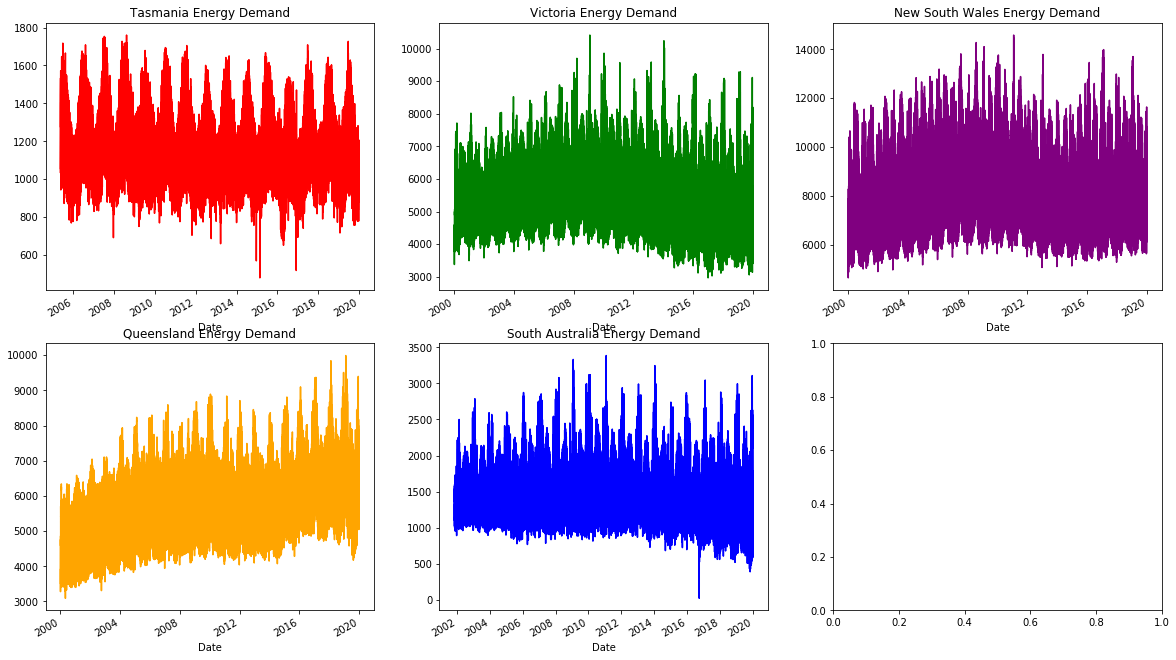

In [5]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 12))

data.groupby("Region").get_group("TAS")["TotalDemand"]["2000":"2019"].plot(color= "red",title="Tasmania Energy Demand",ax=axes[0,0])
data.groupby("Region").get_group("VIC")["TotalDemand"]["2000":"2019"].plot(color= "green",title="Victoria Energy Demand",ax=axes[0,1])
data.groupby("Region").get_group("NSW")["TotalDemand"]["2000":"2019"].plot(color= "purple",title="New South Wales Energy Demand",ax=axes[0,2])
data.groupby("Region").get_group("QLD")["TotalDemand"]["2000":"2019"].plot(color= "orange",title="Queensland Energy Demand",ax=axes[1,0])
data.groupby("Region").get_group("SA")["TotalDemand"]["2000":"2019"].plot(color="blue",title="South Australia Energy Demand",ax=axes[1,1])

## Air Temperature
In the following graphs, there is significant amount of missing air temeprature data over large periods of time ranging from a few months to a 8 years. This makes the data insufficient for our purposes.

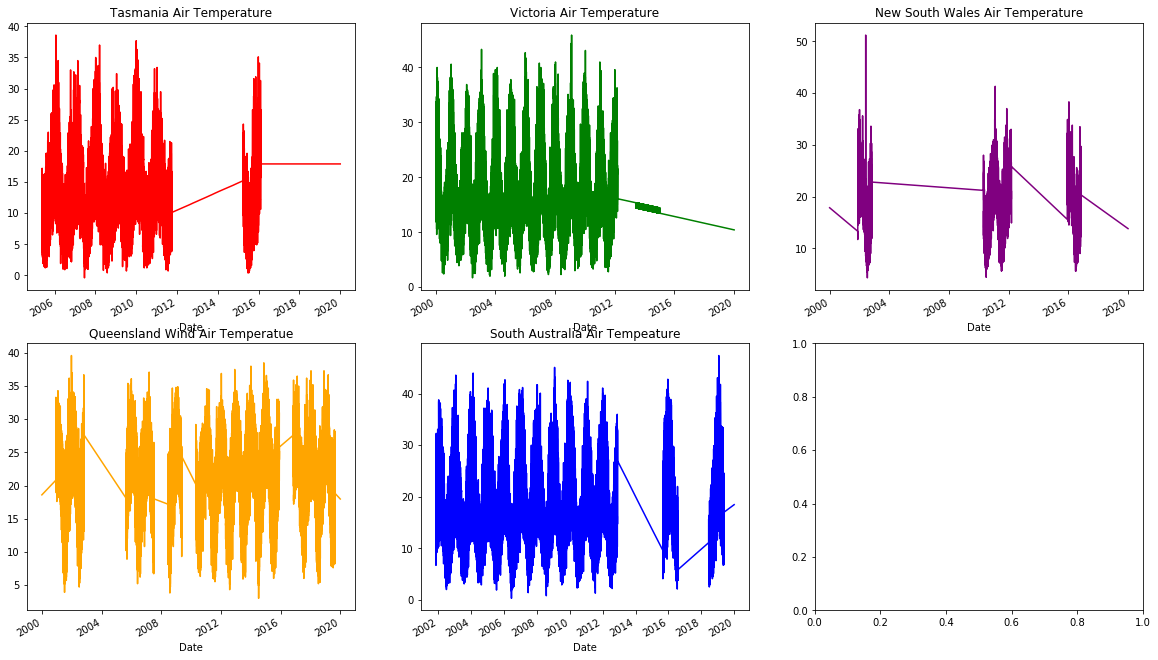

In [6]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 12))

data.groupby("Region").get_group("TAS")["AirTemperature"]["2000":"2019"].plot(color= "red",title="Tasmania Air Temperature",ax=axes[0,0])
data.groupby("Region").get_group("VIC")["AirTemperature"]["2000":"2019"].plot(color= "green",title="Victoria Air Temperature",ax=axes[0,1])
data.groupby("Region").get_group("NSW")["AirTemperature"]["2000":"2019"].plot(color= "purple",title="New South Wales Air Temperature",ax=axes[0,2])
data.groupby("Region").get_group("QLD")["AirTemperature"]["2000":"2019"].plot(color= "orange",title="Queensland Wind Air Temperatue",ax=axes[1,0])
data.groupby("Region").get_group("SA")["AirTemperature"]["2000":"2019"].plot(color= "blue",title="South Australia Air Tempeature",ax=axes[1,1])

## Wet Bulb Temperature
Data is present for the full 20 year period for all states except for about 9 months of Victoria and before 2006 in Tasmania. This is not of significant concern as there plenty of data for the rest of Victoria and all the other states.

C:\Users\stace\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:19: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  fig.subplots_adjust(bottom=0.2)


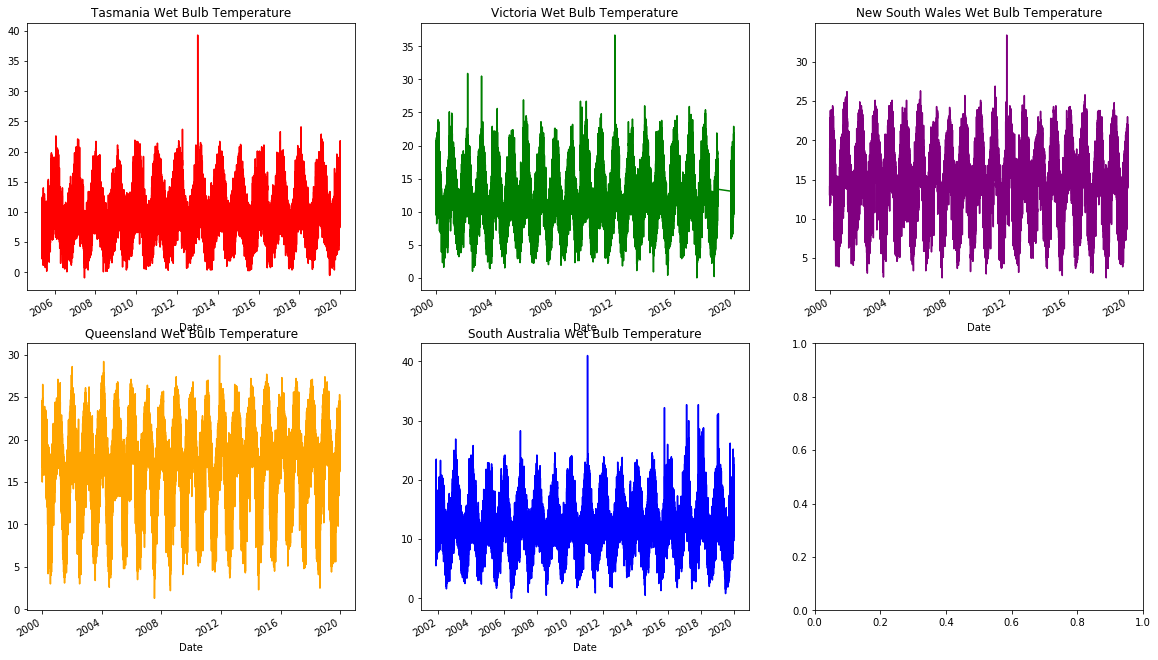

In [7]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 12), constrained_layout=True)

data.groupby("Region").get_group("TAS")["WetBulbTemperature"]["2000":"2019"].plot(color= "red",title="Tasmania Wet Bulb Temperature",ax=axes[0,0])
data.groupby("Region").get_group("VIC")["WetBulbTemperature"]["2000":"2019"].plot(color= "green",title="Victoria Wet Bulb Temperature",ax=axes[0,1])
data.groupby("Region").get_group("NSW")["WetBulbTemperature"]["2000":"2019"].plot(color= "purple",title="New South Wales Wet Bulb Temperature",ax=axes[0,2])
data.groupby("Region").get_group("QLD")["WetBulbTemperature"]["2000":"2019"].plot(color= "orange",title="Queensland Wet Bulb Temperature",ax=axes[1,0])
data.groupby("Region").get_group("SA")["WetBulbTemperature"]["2000":"2019"].plot(color= "blue",title="South Australia Wet Bulb Temperature",ax=axes[1,1])

# Chosen Temperature Measure
Initially `AirTemperature` was to be the primary weather measurement however due to the signficant large bands of missing data this is insufficient for analysis. Luckily `WetBulbTemperature` is a viable substitute as this doesn't have signifcant missing data.

Demonstrated in the below graph, `AirTemperature` and `WetBulbTemperature` has a linear realtionship however as the temperature increases, the deviation that can occur increases.

Note: The data in the graph is from Victoria between 2000 and 2011. This is due to the presence of missing data within `AirTemperature` so a time period has to chosen when both sets of data exist for as long a period of time as possible.

Text(0.5, 0, 'Air Temperature (°C)')

Text(0, 0.5, 'Wet Bulb Temperature (°C)')

Text(0.5, 1.0, 'Victoria Air and Wet Bulb Temperature: 2000-2011')

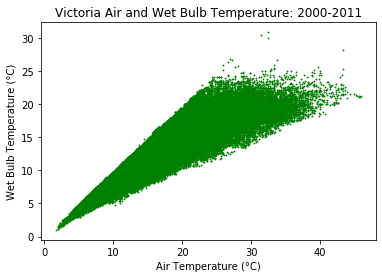

In [8]:
ax = data.groupby("Region").get_group("VIC")["2000":"2011"].plot(kind="scatter",x="AirTemperature", y="WetBulbTemperature",  marker= "*", s=1, color= "green")
ax.set_xlabel('Air Temperature (°C)')
ax.set_ylabel("Wet Bulb Temperature (°C)")
ax.set_title('Victoria Air and Wet Bulb Temperature: 2000-2011')
plt.show()

# Resampling
Due to the large amount of data, it can sometimes be hard to interpret data from a graph as there is alot of noice. A way of simplifying a graph to make it readable by resampling the data.

Demonstrated below is a series of graphs which have been resampled according to different time periods. As the data is resampled more, the trends shown are more easily noticable.

C:\Users\stace\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:19: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  fig.subplots_adjust(bottom=0.2)


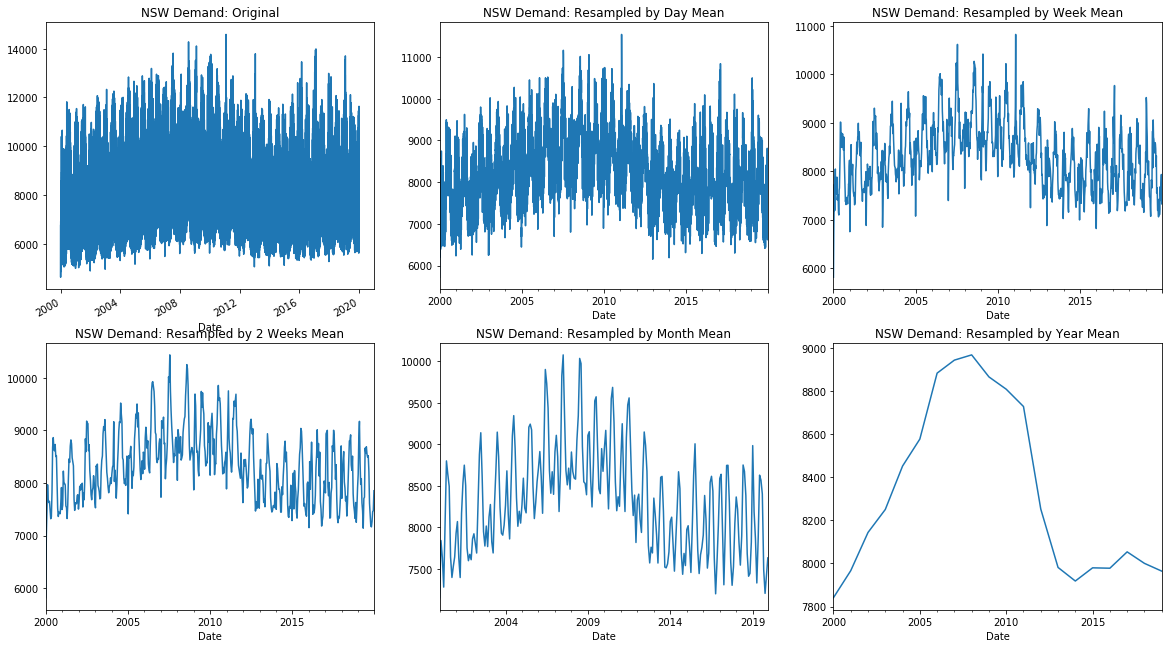

In [9]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 12), constrained_layout=True)

data.groupby("Region").get_group("NSW")["TotalDemand"]["2000":"2019"].plot(title="NSW Demand: Original",ax=axes[0,0])
data.groupby("Region").resample("D").mean()["TotalDemand"]["NSW"]["2000":"2019"].plot(title="NSW Demand: Resampled by Day Mean",ax=axes[0,1])
data.groupby("Region").resample("W").mean()["TotalDemand"]["NSW"]["2000":"2019"].plot(title="NSW Demand: Resampled by Week Mean",ax=axes[0,2])
data.groupby("Region").resample("2W").mean()["TotalDemand"]["NSW"]["2000":"2019"].plot(title="NSW Demand: Resampled by 2 Weeks Mean",ax=axes[1,0])
data.groupby("Region").resample("M").mean()["TotalDemand"]["NSW"]["2000":"2019"].plot(title="NSW Demand: Resampled by Month Mean",ax=axes[1,1])
data.groupby("Region").resample("Y").mean()["TotalDemand"]["NSW"]["2000":"2019"].plot(title="NSW Demand: Resampled by Year Mean",ax=axes[1,2])

# Long Term Analysis

## Demand Over 20 Years
Looking at the demand data over the 20 year period for each state and a 5 year period between 2015 and 2019, we can see the following observations:

### For All States
- There is a repeating consistent cycle of peaks and troughs in the demand for energy
- The demand for each state is differnt as shown by the different scales on the demand axises which is most likely attributed to the vastly different populations of each state however this can not be clarified as we lack population data for this project
- Demand increases in most states during Winter and/or Summer
- Demand is gnerally at it lowest during Spring and Autumn
- Peaking occurs in summer and winter states. The predictability of these peaks is greater in the winter months, regardless of the state.

### Tasmania
- The average of the cycle appears to stay relatively the same over the time frame for which there is demand data for Tasmania
- The maximum occurs during the middle of each year during the winters.
- The minimums occur during the end of each year during Summer months which is different ot the other states which could be the result of significantly cooler Summers compared to the other states.
- The difference between the maximums and minimum stays realtviely consistent over the time period

### Victoria
- The average of the cycle appears to increase steadly to a peak at 2008 where it subsequently decreases again until about 2015 where it plateaus, similarly to New South Wales.
- The maximum occurs during the middle of each year during the winters however also peaks sometimes during the Summer time, most likely on extremely hot days.
- The minimums occur during the end of each year during Summer months.

### New South Wales
- The average of the cycle appears to increase steadly to a peak at 2009 where it subsequently decreases again until about 2014 where it plateaus, similarly to Victoria.
- The maximum occurs during the middle of each year during the winters and during the Summer months, likely due to the highly fluctuating hot and cold days.
- The minimums occur during the Spring and Autumn

### Queensland
- The average of the cycle appears to increase steadly throughout to 2010 where it plateaus until 2015 then jumps up and continues its plateau nature
- The maximums occur during the end of each year during Summer months however there are also minor peaks during winter.
- The minimums occur during the Spring and Autumn

### South Australia
- The average of the cycle appears to stay realtviely flat until slowly decreasing after about 2009
- The maximums occur during the end of each year during Summer months and the middle of the year during winter.
- The minimums occur during the Spring and Autumn

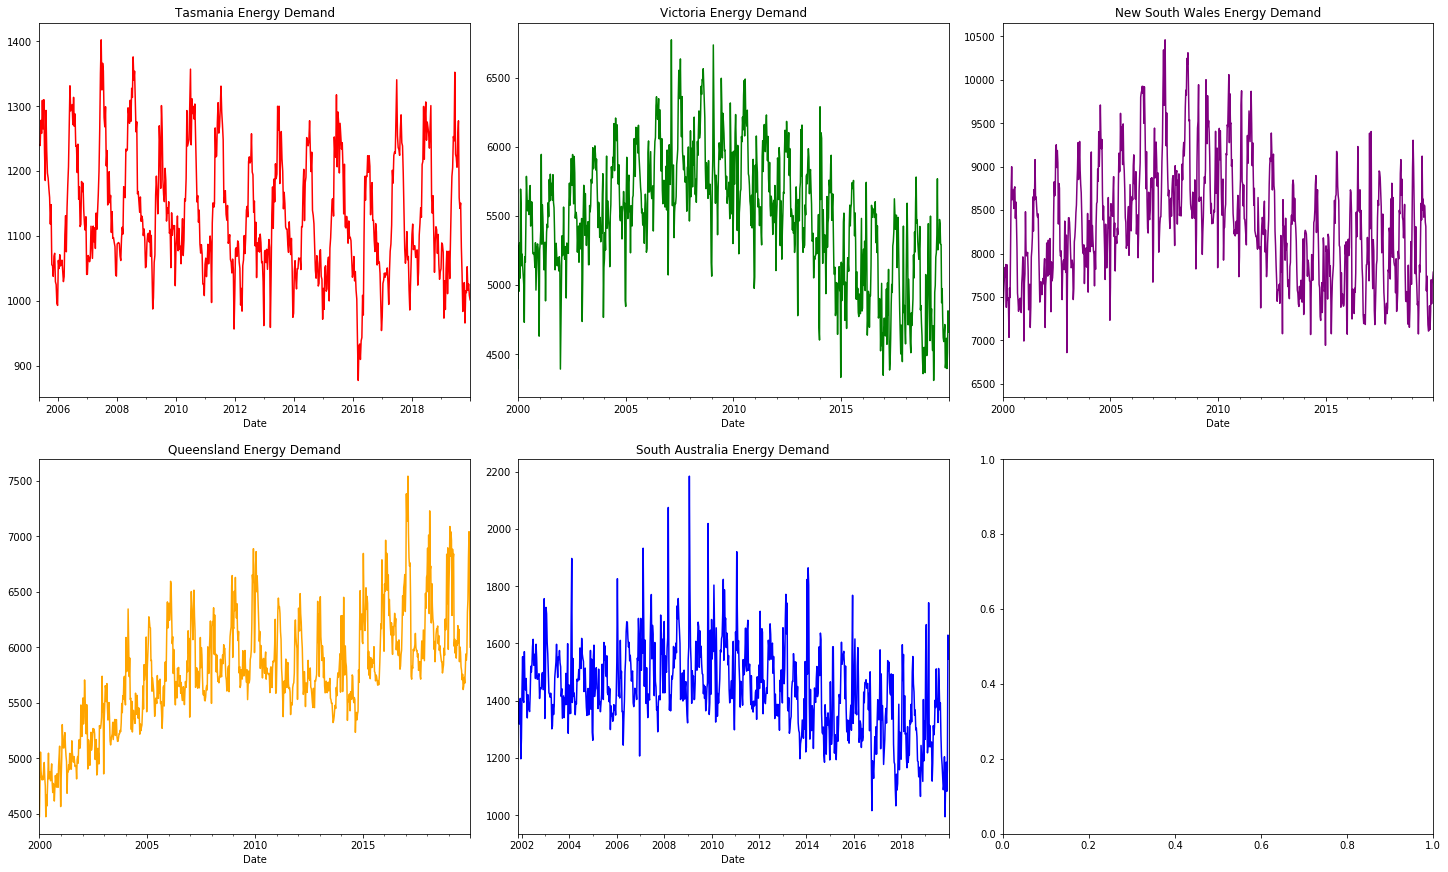

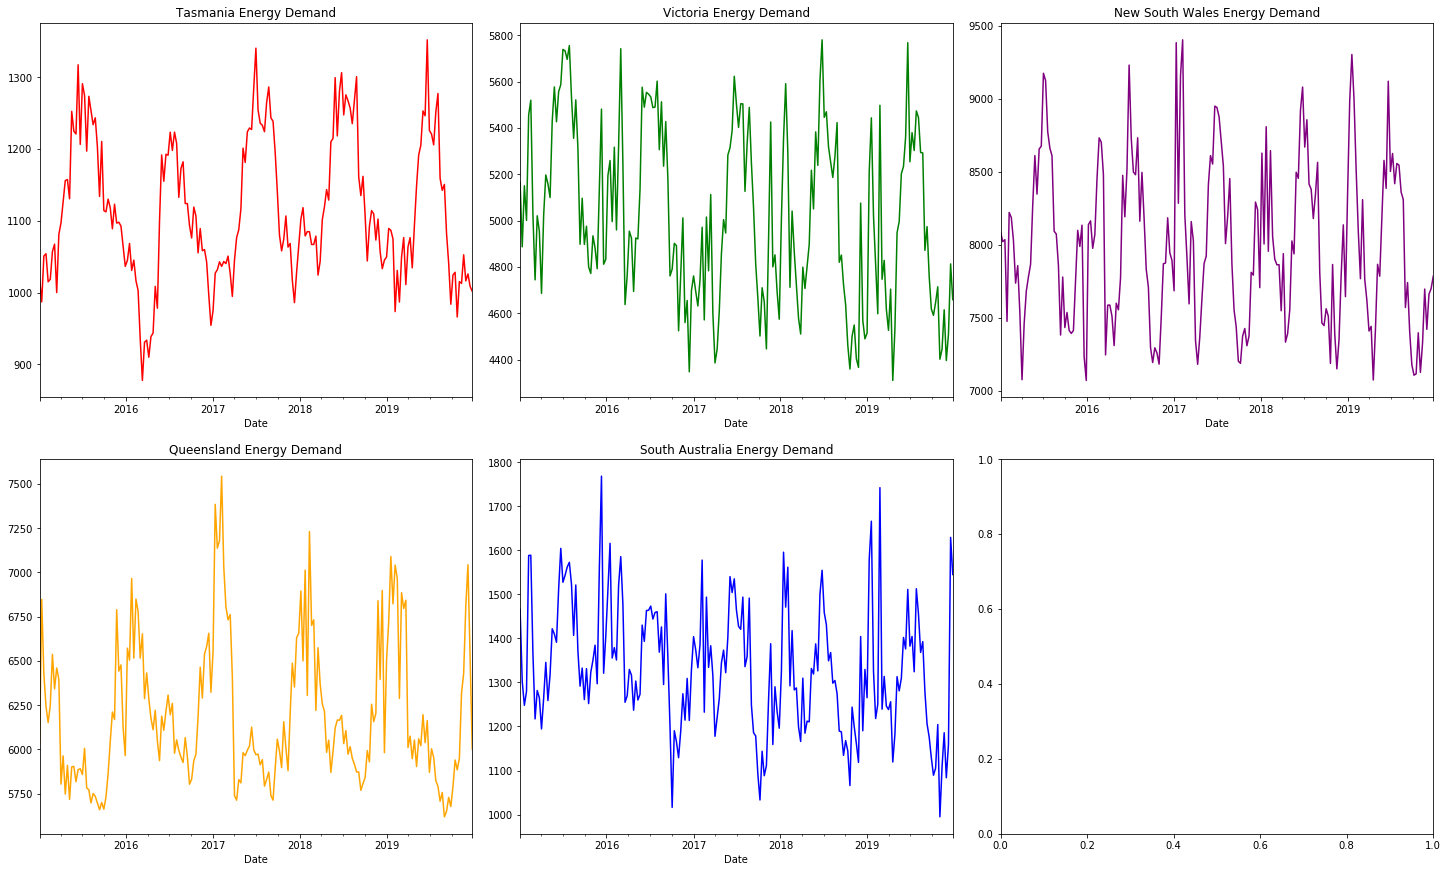

In [10]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 12), constrained_layout=True)

data.groupby("Region").resample("9D").mean()["TotalDemand"]["TAS"]["2000":"2019"].plot(color= "red",title="Tasmania Energy Demand",ax=axes[0,0])
data.groupby("Region").resample("9D").mean()["TotalDemand"]["VIC"]["2000":"2019"].plot(color= "green",title="Victoria Energy Demand",ax=axes[0,1])
data.groupby("Region").resample("9D").mean()["TotalDemand"]["NSW"]["2000":"2019"].plot(color= "purple",title="New South Wales Energy Demand",ax=axes[0,2])
data.groupby("Region").resample("9D").mean()["TotalDemand"]["QLD"]["2000":"2019"].plot(color= "orange",title="Queensland Energy Demand",ax=axes[1,0])
data.groupby("Region").resample("9D").mean()["TotalDemand"]["SA"]["2000":"2019"].plot(color="blue",title="South Australia Energy Demand",ax=axes[1,1])


fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 12), constrained_layout=True)

data.groupby("Region").resample("9D").mean()["TotalDemand"]["TAS"]["2015":"2019"].plot(color= "red",title="Tasmania Energy Demand",ax=axes[0,0])
data.groupby("Region").resample("9D").mean()["TotalDemand"]["VIC"]["2015":"2019"].plot(color= "green",title="Victoria Energy Demand",ax=axes[0,1])
data.groupby("Region").resample("9D").mean()["TotalDemand"]["NSW"]["2015":"2019"].plot(color= "purple",title="New South Wales Energy Demand",ax=axes[0,2])
data.groupby("Region").resample("9D").mean()["TotalDemand"]["QLD"]["2015":"2019"].plot(color= "orange",title="Queensland Energy Demand",ax=axes[1,0])
data.groupby("Region").resample("9D").mean()["TotalDemand"]["SA"]["2015":"2019"].plot(color="blue",title="South Australia Energy Demand",ax=axes[1,1])

### State Demand Comparison
Below is a graph of how the energy demand between the different states compares between 2015 to 2019

New South Wales has the highest demand, followed by Queensland, Victoria, South Australia and finally Tasmania.

These signifcant differences, particulaly South Australia and Tasmania, whose demand is almost only a quarter of the other states, is most likely due to the different populations of the respective states. A state with a larger population would requires more energy demand. This however can not be evaluated conclusively due to the absense of exact population data, however general knowledge of these states does support this assumption.

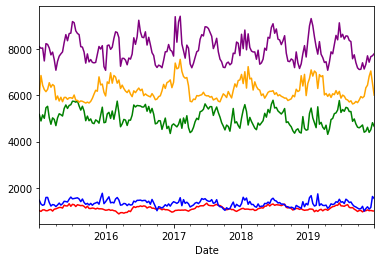

In [11]:
data.groupby("Region").resample("9D").mean()["TotalDemand"]["TAS"]["2015":"2019"].plot(color= "red")
data.groupby("Region").resample("9D").mean()["TotalDemand"]["VIC"]["2015":"2019"].plot(color= "green")
data.groupby("Region").resample("9D").mean()["TotalDemand"]["NSW"]["2015":"2019"].plot(color= "purple")
data.groupby("Region").resample("9D").mean()["TotalDemand"]["QLD"]["2015":"2019"].plot(color= "orange")
data.groupby("Region").resample("9D").mean()["TotalDemand"]["SA"]["2015":"2019"].plot(color="blue")

## Temperature Over 20 Years
Looking at the energy data over the 20 year period for each state and a 5 year period between 2015 and 2019, we can see the following observations:

### For All States
- There is a repeating consistent cycle of peaks and troughs in the temperature
- These peaks of higher temperature occur during Summer of each year for all the states
- Similary, the troughs of colder temperature occurs during Winter of each year for all the states
- This is as expected from knowledge of the season changes within Australian states
- The shape of the cycle for each state is comparably similar

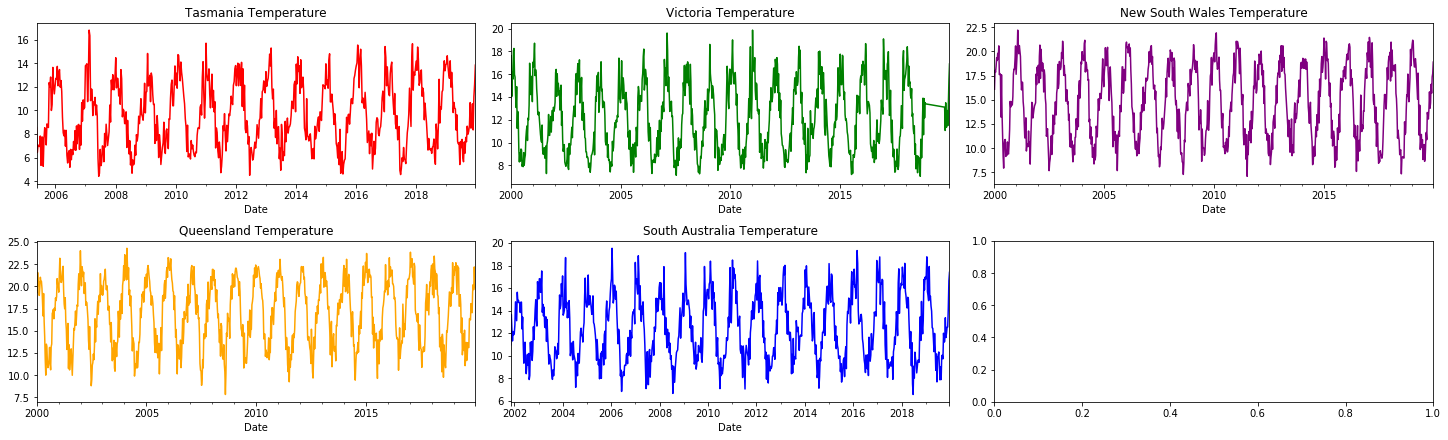

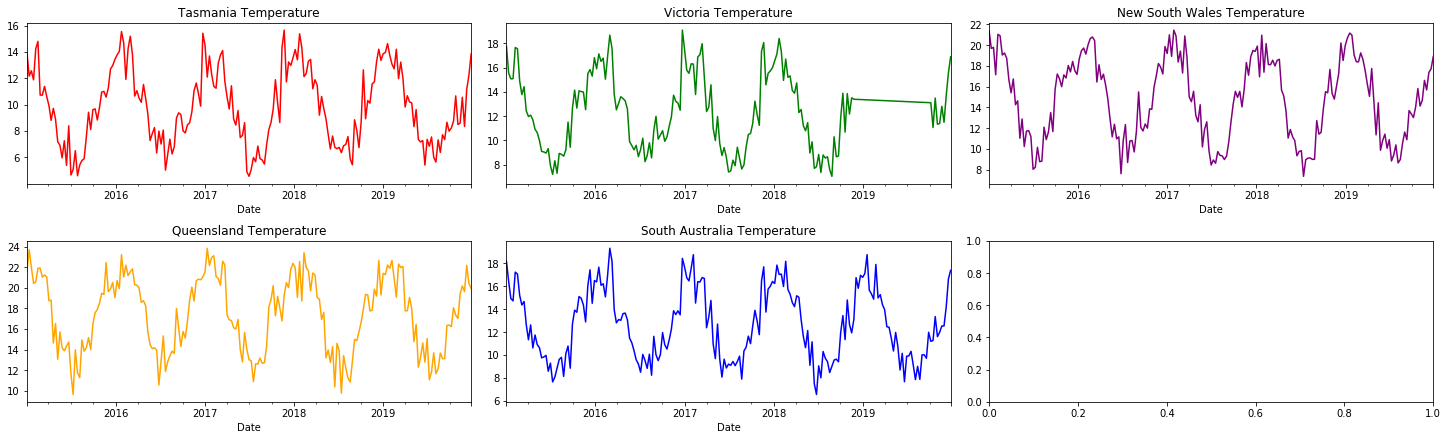

In [12]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 6), constrained_layout=True)

data.groupby("Region").resample("9D").mean()["WetBulbTemperature"]["TAS"]["2000":"2019"].plot(color= "red",title="Tasmania Temperature",ax=axes[0,0])
data.groupby("Region").resample("9D").mean()["WetBulbTemperature"]["VIC"]["2000":"2019"].plot(color= "green",title="Victoria Temperature",ax=axes[0,1])
data.groupby("Region").resample("9D").mean()["WetBulbTemperature"]["NSW"]["2000":"2019"].plot(color= "purple",title="New South Wales Temperature",ax=axes[0,2])
data.groupby("Region").resample("9D").mean()["WetBulbTemperature"]["QLD"]["2000":"2019"].plot(color= "orange",title="Queensland Temperature",ax=axes[1,0])
data.groupby("Region").resample("9D").mean()["WetBulbTemperature"]["SA"]["2000":"2019"].plot(color="blue",title="South Australia Temperature",ax=axes[1,1])


fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 6), constrained_layout=True)

data.groupby("Region").resample("9D").mean()["WetBulbTemperature"]["TAS"]["2015":"2019"].plot(color= "red",title="Tasmania Temperature",ax=axes[0,0])
data.groupby("Region").resample("9D").mean()["WetBulbTemperature"]["VIC"]["2015":"2019"].plot(color= "green",title="Victoria Temperature",ax=axes[0,1])
data.groupby("Region").resample("9D").mean()["WetBulbTemperature"]["NSW"]["2015":"2019"].plot(color= "purple",title="New South Wales Temperature",ax=axes[0,2])
data.groupby("Region").resample("9D").mean()["WetBulbTemperature"]["QLD"]["2015":"2019"].plot(color= "orange",title="Queensland Temperature",ax=axes[1,0])
data.groupby("Region").resample("9D").mean()["WetBulbTemperature"]["SA"]["2015":"2019"].plot(color="blue",title="South Australia Temperature",ax=axes[1,1])

### State Temperature Comparison
Below is a graph of how the temperatures between the different states compares between 2015 to 2019.

Queensland has the highest temepratures in summer, followed by New South Wales, South Australia and Victoria, who are similar, and finally Tasmania.

Likewise Tasmania has the coolest winters followed by South Australia and Victoria, who are similar, New South Wales and finally Queensland who has the warmest winter.

These differences in temperature between the states could account for the different demand cycles in regards to when peaks and troughs occur. A state like Tasmania has really cold winters but not so extreme Summers so demand would be at its highest in Winter and only have a mild peak in Summer. In contrast, Queensland really hot Summers but not so extreme Winters so demand would be at its highest in Summer and only have a mild peak in Winter. States like Victoria, New South Wales and South Australia can have both cold Winters and hot Summers so demands peaks during both these times.

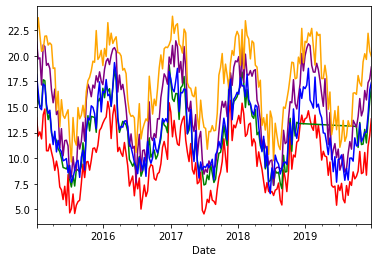

In [13]:
data.groupby("Region").resample("9D").mean()["WetBulbTemperature"]["TAS"]["2015":"2019"].plot(color= "red")
data.groupby("Region").resample("9D").mean()["WetBulbTemperature"]["VIC"]["2015":"2019"].plot(color= "green")
data.groupby("Region").resample("9D").mean()["WetBulbTemperature"]["NSW"]["2015":"2019"].plot(color= "purple")
data.groupby("Region").resample("9D").mean()["WetBulbTemperature"]["QLD"]["2015":"2019"].plot(color= "orange")
data.groupby("Region").resample("9D").mean()["WetBulbTemperature"]["SA"]["2015":"2019"].plot(color="blue")

## State Analysis
The relationship between temperature and energy demand can be shown on a time series graph as shown below. While this shows oscillation of temeprature and energy demand for eahc state. the realtionship between is best shown a scatter plot of `WetBulbTemperature` and `TotalDemand`, which also having the added benefit of eliminated the time variable.

### Tasmania:
Demand is highest when tmeperature is at its mimimum because Tasmania is a realtively cooler Australian State

### Victoria:
When the temperature is at its lowest, demand is high however it is highest when the temperature is at its maximum. This due to the fact that Victoria has both really cold and hot weather.

### New South Wales:
When the temperature is at its lowest and highest, demand is at its peak. This due to the fact that New South Wales has both really cold and hot weather, more so that Victoria.

### Queensland:
In contrast to Tasmania, Queensland has realtively more warmer climate and as such the demand is highest when temperature is at its maximum.

### South Australia:
Similar to Victoria, when the temperature is at its lowest, demand is high however it is highest when the temperature is at its maximum. This due to the fact that Sout Australia has both relatively cold and hot weather.

Text(0.5, 0, 'Temperature (°C)')

Text(0, 0.5, 'Energy Demand (MW)')

Text(0.5, 1.0, 'Temperature and Demand in Tasmania (2000-2018)')

Text(0.5, 0, 'Temperature (°C)')

Text(0, 0.5, 'Energy Demand (MW)')

Text(0.5, 1.0, 'Temperature and Demand in Victoria (2000-2018)')

Text(0.5, 0, 'Temperature (°C)')

Text(0, 0.5, 'Energy Demand (MW)')

Text(0.5, 1.0, 'Temperature and Demand in New South Wales (2000-2018)')

Text(0.5, 0, 'Temperature (°C)')

Text(0, 0.5, 'Energy Demand (MW)')

Text(0.5, 1.0, 'Temperature and Demand in Queensland (2000-2018)')

Text(0.5, 0, 'Temperature (°C)')

Text(0, 0.5, 'Energy Demand (MW)')

Text(0.5, 1.0, 'Temperature and Demand in South Australia (2000-2018)')

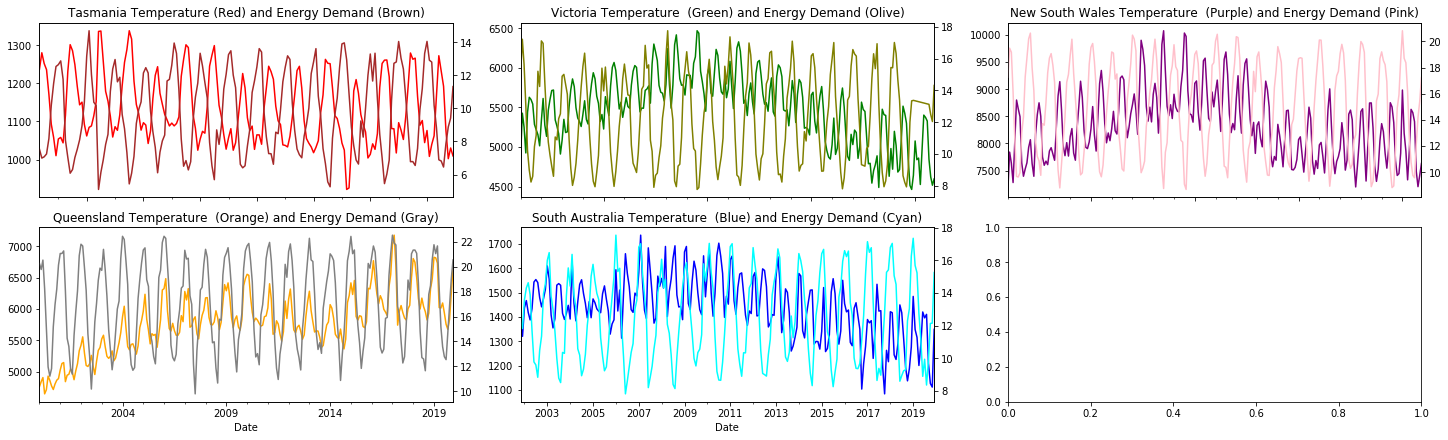

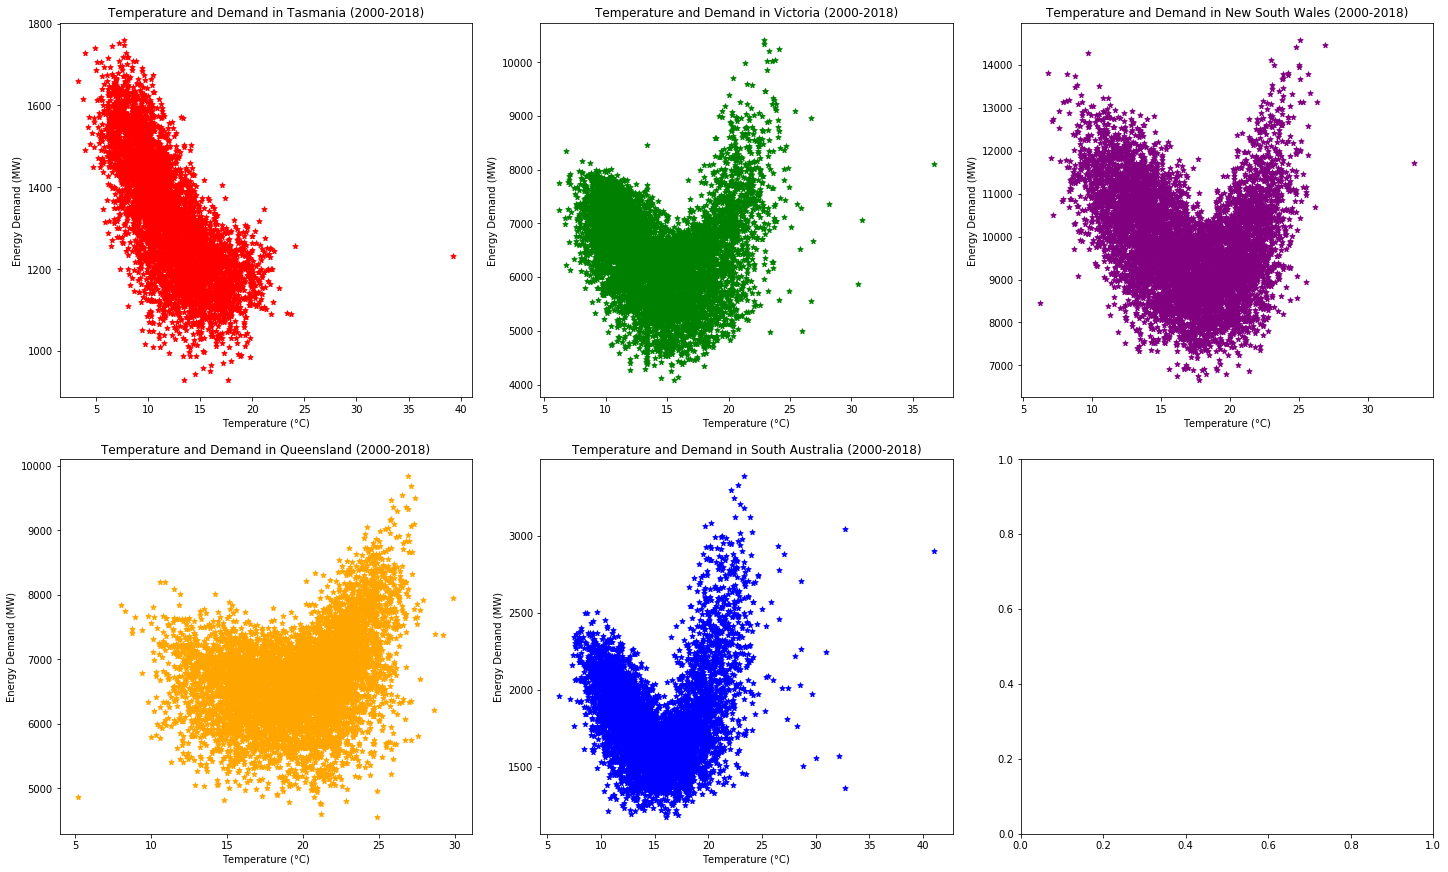

In [14]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 6), constrained_layout=True)

data.groupby("Region").resample("M").mean()["TotalDemand"]["TAS"]["2000":"2019"].plot(color= "red",ax=axes[0,0])
data.groupby("Region").resample("M").mean()["TotalDemand"]["VIC"]["2000":"2019"].plot(color= "green",ax=axes[0,1])
data.groupby("Region").resample("M").mean()["TotalDemand"]["NSW"]["2000":"2019"].plot(color= "purple",ax=axes[0,2])
data.groupby("Region").resample("M").mean()["TotalDemand"]["QLD"]["2000":"2019"].plot(color= "orange",ax=axes[1,0])
data.groupby("Region").resample("M").mean()["TotalDemand"]["SA"]["2000":"2019"].plot(color="blue",ax=axes[1,1])

data.groupby("Region").resample("M").mean()["WetBulbTemperature"]["TAS"]["2000":"2019"].plot(color= "brown",title="Tasmania Temperature (Red) and Energy Demand (Brown)",ax=axes[0,0], secondary_y=True)
data.groupby("Region").resample("M").mean()["WetBulbTemperature"]["VIC"]["2000":"2019"].plot(color= "olive",title="Victoria Temperature  (Green) and Energy Demand (Olive)",ax=axes[0,1], secondary_y=True)
data.groupby("Region").resample("M").mean()["WetBulbTemperature"]["NSW"]["2000":"2019"].plot(color= "pink",title="New South Wales Temperature  (Purple) and Energy Demand (Pink)",ax=axes[0,2], secondary_y=True)
data.groupby("Region").resample("M").mean()["WetBulbTemperature"]["QLD"]["2000":"2019"].plot(color= "gray",title="Queensland Temperature  (Orange) and Energy Demand (Gray)",ax=axes[1,0], secondary_y=True)
data.groupby("Region").resample("M").mean()["WetBulbTemperature"]["SA"]["2000":"2019"].plot(color="cyan",title="South Australia Temperature  (Blue) and Energy Demand (Cyan)",ax=axes[1,1], secondary_y=True)

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 12), constrained_layout=True)

ax = data.groupby("Region").get_group("TAS").resample("D").max()["2000":"2018"].plot(kind="scatter",x="WetBulbTemperature", y="TotalDemand",  marker= "*", s=30, color= "red", ax=axes[0,0])
ax.set_xlabel('Temperature (°C)')
ax.set_ylabel("Energy Demand (MW)")
ax.set_title('Temperature and Demand in Tasmania (2000-2018)')


ax = data.groupby("Region").get_group("VIC").resample("D").max()["2000":"2018"].plot(kind="scatter",x="WetBulbTemperature", y="TotalDemand",  marker= "*", s=30, color= "green", ax=axes[0,1])
ax.set_xlabel('Temperature (°C)')
ax.set_ylabel("Energy Demand (MW)")
ax.set_title('Temperature and Demand in Victoria (2000-2018)')


ax = data.groupby("Region").get_group("NSW").resample("D").max()["2000":"2018"].plot(kind="scatter",x="WetBulbTemperature", y="TotalDemand",  marker= "*", s=30, color= "purple", ax=axes[0,2])
ax.set_xlabel('Temperature (°C)')
ax.set_ylabel("Energy Demand (MW)")
ax.set_title('Temperature and Demand in New South Wales (2000-2018)')


ax = data.groupby("Region").get_group("QLD").resample("D").max()["2000":"2018"].plot(kind="scatter",x="WetBulbTemperature", y="TotalDemand",  marker= "*", s=30, color= "orange", ax=axes[1,0])
ax.set_xlabel('Temperature (°C)')
ax.set_ylabel("Energy Demand (MW)")
ax.set_title('Temperature and Demand in Queensland (2000-2018)')


ax = data.groupby("Region").get_group("SA").resample("D").max()["2000":"2018"].plot(kind="scatter",x="WetBulbTemperature", y="TotalDemand",  marker= "*", s=30, color= "blue", ax=axes[1,1])
ax.set_xlabel('Temperature (°C)')
ax.set_ylabel("Energy Demand (MW)")
ax.set_title('Temperature and Demand in South Australia (2000-2018)')
plt.show()

# Short Term Analysis
The graphs below show the comparision of energy demand between regions for a single day and a week period for Winter and Summer.

Generally the energy demand from New South Wales is higher than that in other regions and Tasmania & South Australia are far lower than other regions due to population size however the pattern is the same across them all.
There is generally always two periods of increased energy demand, in the morning from about 5-9 am  and in the early evening from 4-7pm. These are the times in which people are most active in the homes, before and after work and study for most people.
This pattern persists through various times as shown from the random selection of times form different states and time of year.

A Winter day is relatively similar across the states with regards to the pattern of increasing and decreasing energy demand.
During a week in Winter, the pattern across days is similar however the demand is increased in the later days during the week.
The demand on a Summer day is similar to that of a Winter day however when considering a week in summer, the trend in a day can be lost on really hot days where it just peaks once instead of twice.

## Winter Day (11/06/2017)

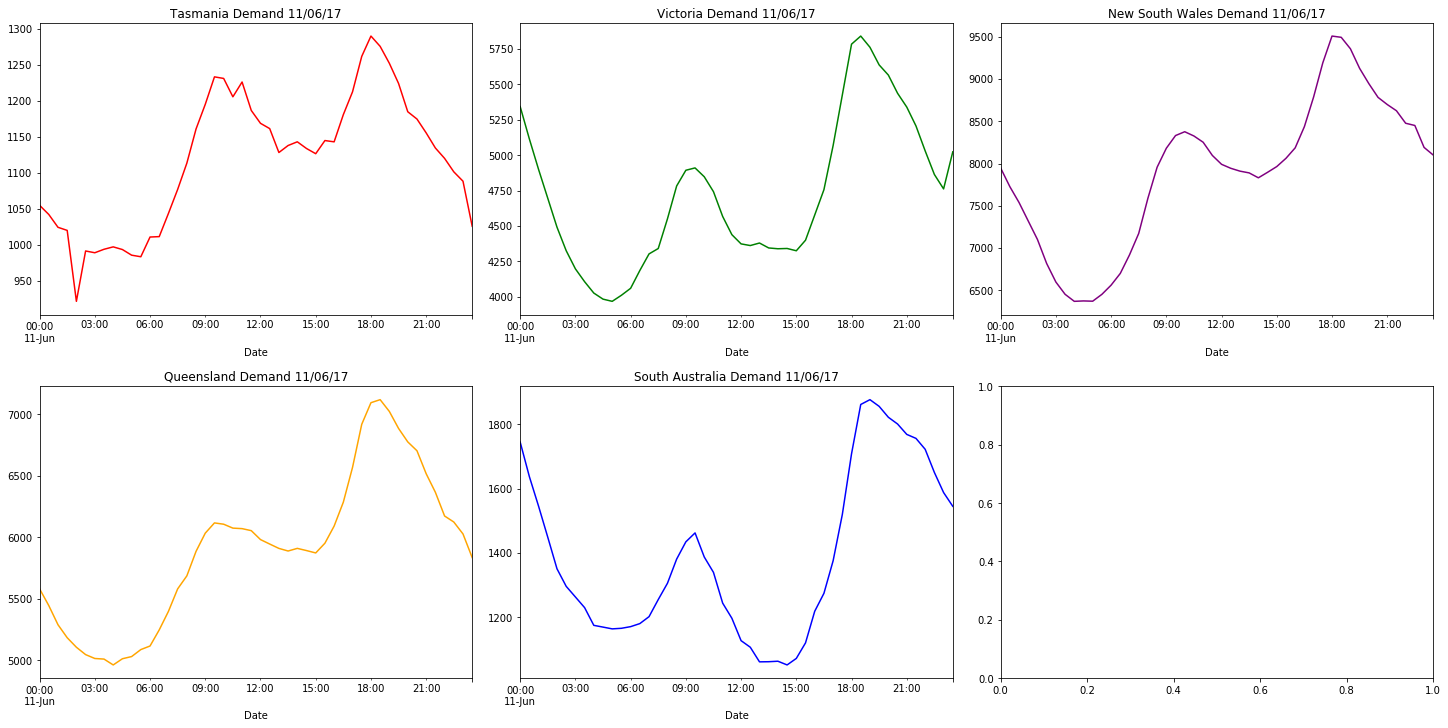

In [15]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 10), constrained_layout=True)

data.groupby("Region").get_group("TAS")["TotalDemand"]["2017-06-11"].plot(color= "red",title="Tasmania Demand 11/06/17",ax=axes[0,0])
data.groupby("Region").get_group("VIC")["TotalDemand"]["2017-06-11"].plot(color= "green",title="Victoria Demand 11/06/17",ax=axes[0,1])
data.groupby("Region").get_group("NSW")["TotalDemand"]["2017-06-11"].plot(color= "purple",title="New South Wales Demand 11/06/17",ax=axes[0,2])
data.groupby("Region").get_group("QLD")["TotalDemand"]["2017-06-11"].plot(color= "orange",title="Queensland Demand 11/06/17",ax=axes[1,0])
data.groupby("Region").get_group("SA")["TotalDemand"]["2017-06-11"].plot(color="blue",title="South Australia Demand 11/06/17",ax=axes[1,1])

## Winter Week (11/06/2017 - 17/06/2017)

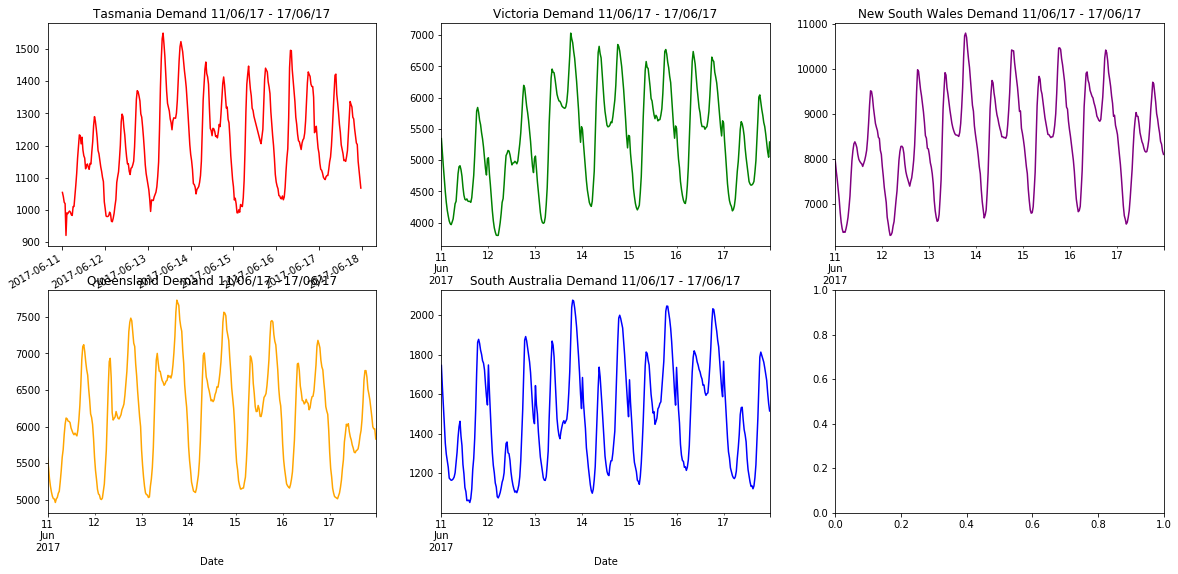

In [16]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))

data.groupby("Region").get_group("TAS")["TotalDemand"]["2017-06-11":"2017-06-17"].plot(color= "red",title="Tasmania Demand 11/06/17 - 17/06/17",ax=axes[0,0])
data.groupby("Region").get_group("VIC")["TotalDemand"]["2017-06-11":"2017-06-17"].plot(color= "green",title="Victoria Demand 11/06/17 - 17/06/17",ax=axes[0,1])
data.groupby("Region").get_group("NSW")["TotalDemand"]["2017-06-11":"2017-06-17"].plot(color= "purple",title="New South Wales Demand 11/06/17 - 17/06/17",ax=axes[0,2])
data.groupby("Region").get_group("QLD")["TotalDemand"]["2017-06-11":"2017-06-17"].plot(color= "orange",title="Queensland Demand 11/06/17 - 17/06/17",ax=axes[1,0])
data.groupby("Region").get_group("SA")["TotalDemand"]["2017-06-11":"2017-06-17"].plot(color="blue",title="South Australia Demand 11/06/17 - 17/06/17",ax=axes[1,1])

## Summer Day (14/01/2018)

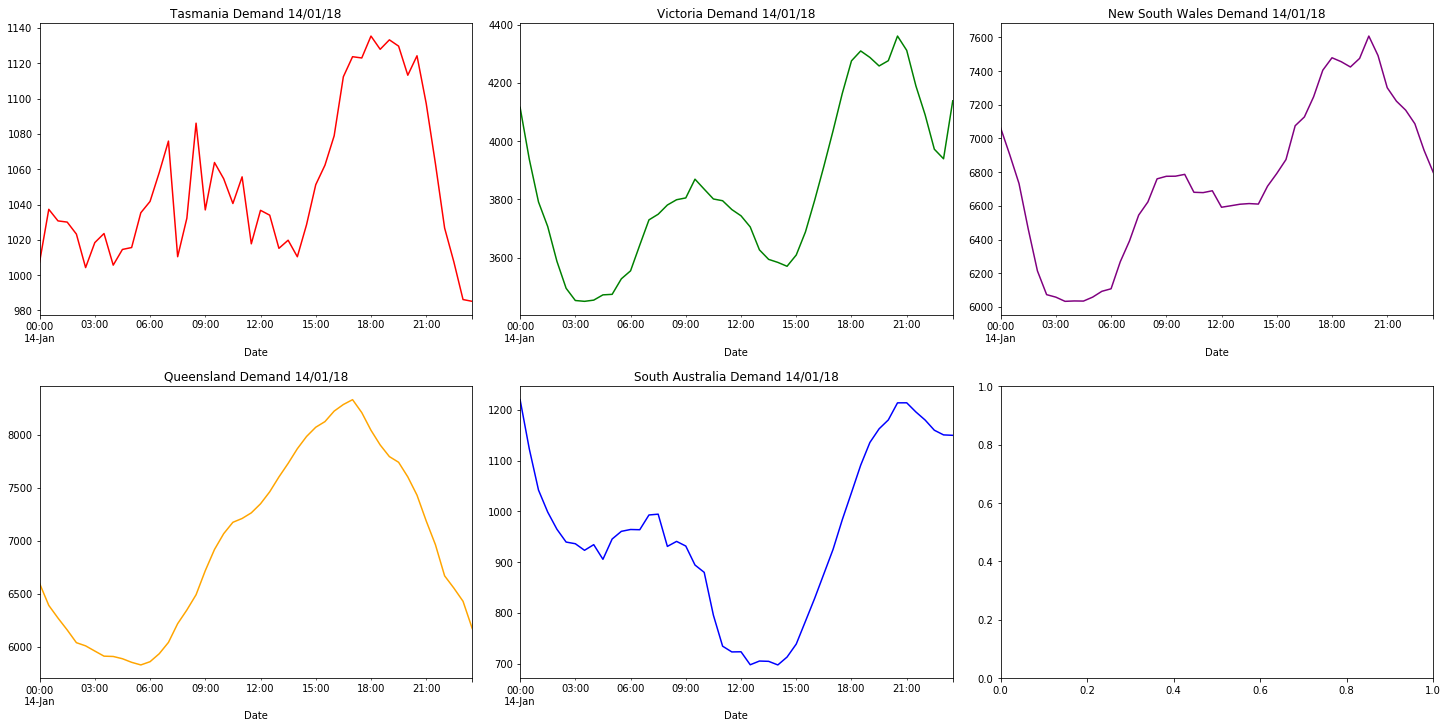

In [17]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 10), constrained_layout=True)

data.groupby("Region").get_group("TAS")["TotalDemand"]["2018-1-14"].plot(color= "red",title="Tasmania Demand 14/01/18",ax=axes[0,0])
data.groupby("Region").get_group("VIC")["TotalDemand"]["2018-1-14"].plot(color= "green",title="Victoria Demand 14/01/18",ax=axes[0,1])
data.groupby("Region").get_group("NSW")["TotalDemand"]["2018-1-14"].plot(color= "purple",title="New South Wales Demand 14/01/18",ax=axes[0,2])
data.groupby("Region").get_group("QLD")["TotalDemand"]["2018-1-14"].plot(color= "orange",title="Queensland Demand 14/01/18",ax=axes[1,0])
data.groupby("Region").get_group("SA")["TotalDemand"]["2018-1-14"].plot(color="blue",title="South Australia Demand 14/01/18",ax=axes[1,1])

## Summer Week (14/01/2018 - 20/01/2019)

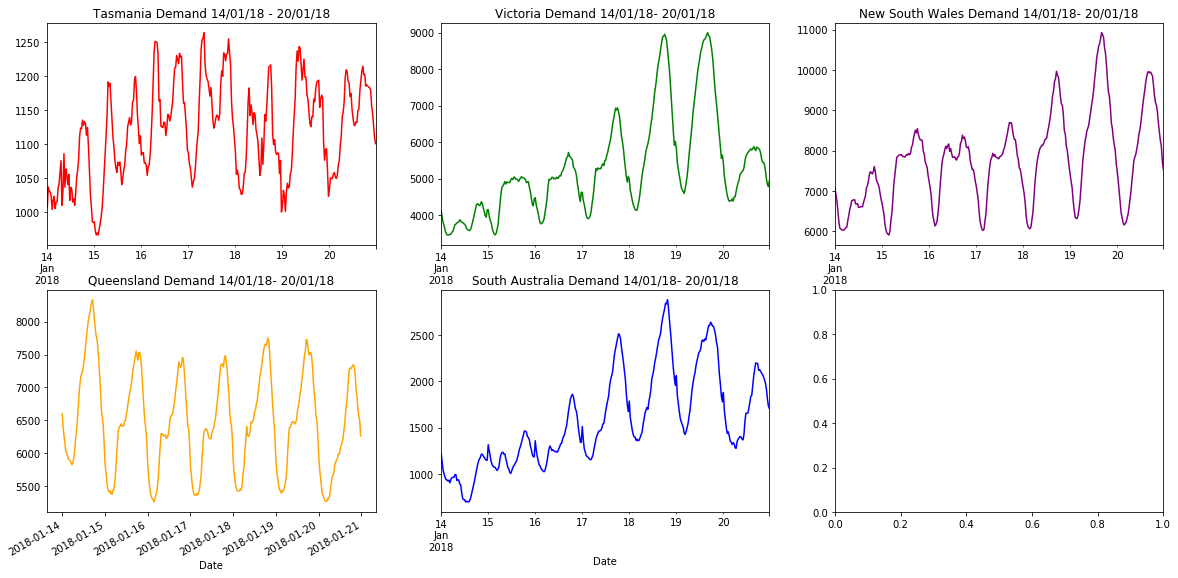

In [18]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))

data.groupby("Region").get_group("TAS")["TotalDemand"]["2018-1-14":"2018-1-20"].plot(color= "red",title="Tasmania Demand 14/01/18 - 20/01/18",ax=axes[0,0])
data.groupby("Region").get_group("VIC")["TotalDemand"]["2018-1-14":"2018-1-20"].plot(color= "green",title="Victoria Demand 14/01/18- 20/01/18",ax=axes[0,1])
data.groupby("Region").get_group("NSW")["TotalDemand"]["2018-1-14":"2018-1-20"].plot(color= "purple",title="New South Wales Demand 14/01/18- 20/01/18",ax=axes[0,2])
data.groupby("Region").get_group("QLD")["TotalDemand"]["2018-1-14":"2018-1-20"].plot(color= "orange",title="Queensland Demand 14/01/18- 20/01/18",ax=axes[1,0])
data.groupby("Region").get_group("SA")["TotalDemand"]["2018-1-14":"2018-1-20"].plot(color="blue",title="South Australia Demand 14/01/18- 20/01/18",ax=axes[1,1])

# Conclusion
This exploratory data analysis has concluded that there is indeed a relationship between the temperature and energy demand within Australia. When the temperature is lower or higher, the demand is at its peak however the reatively climate of each sdate has an impact on this aswell. Throughout a year, energy demand can peak on cold days when people use heaters to keep warm and on hot days when people use their air conditioners to keep cool. Energy demand is higher during the day at 9am and at its peak at 6pm which is time when people are most active within their homes. Demand is also at its lowest at about 5am when people are asleep.

While temperature has a profound effect on energy demand, from this analysis, it is conclusive that state, climate, population and day of the week may have an impact also on energy demand. This should be further investigated.